# Exercice 2: The birthday paradox and statistics


## Q1: Cryptographic hash functions
A cryptographic hash function is a function $F: \{0, 1\}^m \rightarrow \{0,1\}^n$ satisfying the following properties:

1. It is easy to compute $F(x)$ for all $x \in \{0, 1\}^m$.
2. Given a $y \in \{0, 1\}^n$, it is hard to find an $x \in \{0, 1\}^m$ such that $F(x) = y$.
3. It is hard to find two elements $x_1 \neq x_2$ that have the same image: $F(x_1) = F(x_2)$.

Usually the domain size is greater than the range (i.e. $m > n$). Therefore it must be possible to solve problems 2 or 3 by brute force. In this exercise we will consider the following hash function:

In [ ]:
import random
import hashlib
def h(s, l=None):
    """Compute SHA256 hash value of x for a given output length l
    s: string
    l: non zero positive integer
    """
    a = hashlib.sha256(str(s).encode())
    b = a.hexdigest()
    if l:
        b = b[0:l]
    return b

In [ ]:
print(h("CIAO", 4))
print(h("CIAI", 4))

6613
090e


The function defined above takes two integers $x$ and $l$ and returns a character string of length $l$. The output is the *image* and $x$ is referred to as the *preimage*.


(a) Use the hash function to compute the hash values of the strings 'bonjour' and 'bonjour1'. Are there any similarities between the two results?

Note that the function can also be applied to integers. Example: ```h(1234, 4)```.

(b) Generate random integers (or strings) and find an input whose image under $h(x, 4)$ is "abcd". How many times does $h(x, 4)$ need to be evaluated before finding the preimage? Complete the function ```preimageof``` below.


In [ ]:
print(h("bonjour"))
print(h("bonjour2"))

2cb4b1431b84ec15d35ed83bb927e27e8967d75f4bcd9cc4b25c8d879ae23e18
c3c00979959a6d37d00fe04baf3d7c7214136930286cc1784fca5fde1dcd7b20


In [ ]:
def preimageof(s):
    """ Find the preimage of string s under the function h.
    """
    r = 0
    found = False
    hash_len = len(s)
    # complete this function
    while not found:
      current_hash = h(r, hash_len)
      if current_hash == s:
        found = True
      else:
        r += 1
    return r

# the following should return 'True':
x = preimageof('abcd')
print(x,  h(x), h(x,4) == 'abcd')

40855 abcd49bfd218b62539aac543ac78b699ca84d312b3a09e337520ac79c0f93f61 True


(c) Find two integers with the same image. How many times has $h(x, 4)$ been computed? Complete the function ```findcollision```.

In [ ]:
import random
def findcollision(length):
    """
    Find a collision of outputs of given length from the function h by
    computing the function values for random inputs
    length: non zero positive integer
    """
    count = 0
    x1 = 0
    x2 = 0
    MAX = 65535555
    found = False
    hashes = {}
    # complete this function
    while not found:
      count+=1
      n = random.randrange(MAX)
      hash = h(n,length)
      if hash in hashes and n != hashes[hash]:
        x1 = hashes[hash]
        x2 = n
        found = True
      else:
        hashes[hash] = n
    print(count)
    return [x1, x2]

length = 6
[x1, x2] = findcollision(length)
y1 = h(x1, length)
y2 = h(x2, length)
print(x1, x2, y1, y2, x1 != x2 and y1 == y2)

4876
50569809 18041174 9e1ae8 9e1ae8 True


In [ ]:
print(preimageof("a"))
print(preimageof("ab"))
print(preimageof("abc"))
print(preimageof("abcd"))
print(preimageof("abcde"))

38
388
2867
40855
128553


(d) Find preimages of "a", "ab", "abc" and "abcde" for $h(x, 1), h(x, 2), h(x, 3)$ and $h(x, 5)$ respectively. List the number of computations (of the hash function).

In [ ]:
print(findcollision(1))
print(findcollision(2))
print(findcollision(3))
print(findcollision(4))
print(findcollision(5))

5
[40965465, 19621252]
20
[24022816, 37380032]
45
[59213879, 11955271]
729
[28404730, 42847335]
1804
[41946330, 31712593]


(e) Find pairs of integers that have the same image under $h(x, 1)$. Same question for $h(x, 2), h(x, 3)$ and $h(x, 5)$ respectively. Compare the number of computations with the results from question (d) and explain the observed differences.


## Q2: Merkle key establishment based on the birthday paradox

A key exchange protocol allows two persons (Alice and Bob) to share a piece of secret information ('the key'). We assume that a third person (Eve) intercepts all communication between Alice and Bob. Key exchange protocols are designed in such a way that Alice and Bob can compute the key in an easy way, while it is significantly harder for Eve to find the key.

Let $h: \{1, ..., n^2\} \rightarrow R$ be a (publicly known) hash function where $R$ is some range of size greater than $n^2$. To create a shared key, Alice and Bob perform the following steps.

1. Alice samples $n$ random elements $x_1, ..., x_n$ from the set $\{1, ..., n^2\}$.
2. Alice computes the images $y_1 = h(x_1), ..., y_n = h(x_n)$ using the hash function. She sends this list of images to Bob.
3. Bob computes the hash function on random inputs from the set $\{1, ..., n^2\}$ until he finds **one of the $n$ values** in the list $y_1, ..., y_n$. He returns to Alice the image $y_i$ corresponding to the preimage $x_i$ that he found.
4. Alice looks up in her list $x_1, ..., x_n$ the preimage corresponding to $y_i$. Now Alice and Bob share the secret value $x_i$.

(a) How many computations (of the hash function) do Alice and Bob perform on average during the protocol?


(b) How can Eve find the key $x_i$ and how many times on average will she have to compute the hash function?


In this exercise, we will use the hash function ```h(x, 40)``` from Q1.

(c) Implement functions simulating Alice, Bob and Eve. Compare the number of computations performed by Bob and Eve for $n = 100$.


In [ ]:
Alice and BOB n times; Eve n squared because she has to try all the numbers

In [ ]:
# use the function h(x,40)
n = 100
max = 10000
import random
# complete and execute these 3 functions:

def alice(n):
    X = [random.randint(1,max) for i in range(n)]
    Y = [h(el, 40) for el in X ]
    return [X, Y]

def bob(Y, n):
    preimage = 0
    image = 0
    i = 0
    while image not in Y:
      preimage = random.randint(1,max)
      image = h(preimage, 40)
      i += 1
    print("BOB:", i, "Tries")
    return [preimage, image]

def eve(image, n):
    preimage = 0
    current_image = 0
    i = 0
    while image != current_image:
      preimage = random.randint(1,max)
      current_image = h(preimage, 40)
      i += 1
    print("ALICE:", i, "Tries")
    return preimage
X,Y = alice(n)
preimage, image = bob(Y, n)
hacked_preimage = eve(image, n)
print(preimage == hacked_preimage)


BOB: 63037 Tries
ALICE: 2440490 Tries
True


(d) Find a value for the parameter $n$ for which the key exchange is 'safe', that is: Eve does not succeed within 1 minute, while Bob is able to perform all of his computations within a second.  


In [ ]:

import time
n = 100000000
max = 10000000
X,Y = alice(n)
start_time = time.time()
preimage, image = bob(Y, n)
bob_time = time.time() - start_time
print(bob_time)

start_time = time.time()
hacked_preimage = eve(image, n)
print(preimage == hacked_preimage)
alice_time = time.time() - start_time
print(alice_time)

BOB: 138775 Tries
0.9902069568634033
ALICE: 12134985 Tries
True
30.024214267730713


## Q3: Correlations

The total number of students present in the science faculty building at any given hour of the day can be modeled as a sum of two normal distributions:

In [ ]:
import numpy as np
L = []
students = list()
for i in range(1000):
    L.append(int(np.random.normal(10, 1.5)))
    L.append(int(np.random.normal(15, 1.5)))
for time in range(24):
    students.append(L.count(time))

print(students)

[0, 0, 0, 0, 0, 1, 13, 74, 188, 254, 231, 171, 123, 184, 230, 268, 182, 61, 15, 5, 0, 0, 0, 0]


The distributions are centered around 10 AM and 3 PM and have a standard deviation of $1.5$. The amount of coffee consumed at any given hour can also be modeled as a sum of two normal distributions. These two distributions are centered around $10h30$ AM and $4$ PM and both have a standard deviation of $0.3$.



In [ ]:
import matplotlib.pyplot as plt
L = list()
coffee = list()
for i in range(200):
    L.append(int(np.random.normal(10.5, .3)))
    L.append(int(np.random.normal(16, .3)))
for time in range(24):
    coffee.append(L.count(time))

print(coffee)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 183, 7, 0, 0, 0, 103, 97, 0, 0, 0, 0, 0, 0, 0]


(a) Make a plot of the number of students at any given hour. In the same graph, plot the amount of coffee consumed. Is there a relation between the two data?

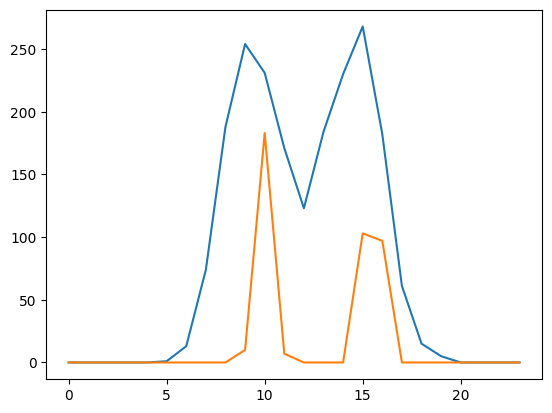

In [ ]:
plt.plot(students)
plt.plot(coffee)


(b) Make a scatter plot with on the y-axis the amount of coffee consumed and on the x-axis the number of students. Are the points aligned? Use numpy to compute the corrolation coefficient.

0.5545814931728354

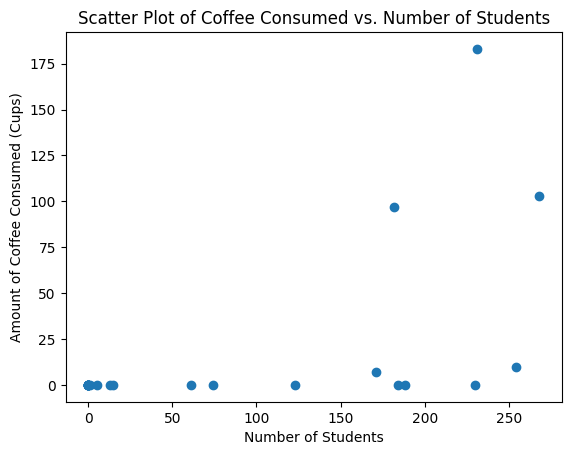

In [ ]:
plt.title('Scatter Plot of Coffee Consumed vs. Number of Students')
plt.xlabel('Number of Students')
plt.ylabel('Amount of Coffee Consumed (Cups)')
plt.scatter(students, coffee)
np.corrcoef(students, coffee)[0, 1]

Consider the list:

In [ ]:
daylight = list(np.zeros(24))
for i in range(12):
    daylight[i+7] = 1
print(daylight)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.0, 0.0, 0.0, 0.0, 0.0]


The i-th position of the list is non zero if and only if we can see clear daylight on the i-th hour of the day.

(c) In the graph of (a), add a plot of the list representing the daylight. Does there seem to be a relation between the number of students and the daylight?

(d) Make a scatter plot of the two data. Are the points aligned?


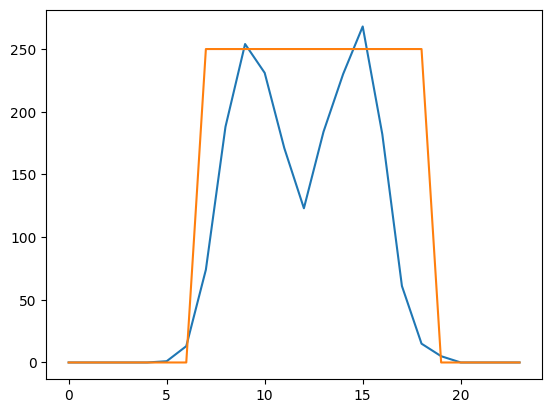

In [ ]:
plt.plot(students)
plt.plot([d * 250 for d in daylight])

0.8310360890245351

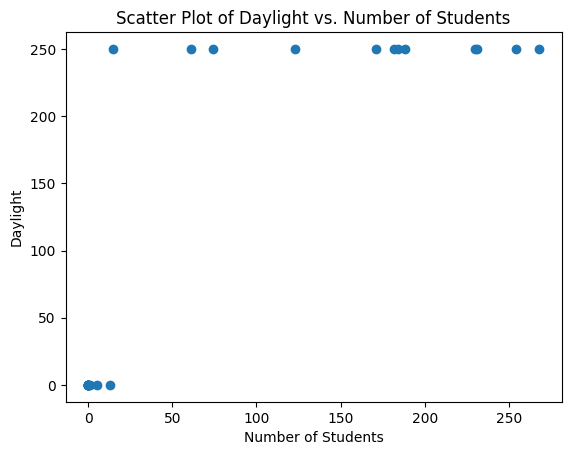

In [ ]:
plt.title('Scatter Plot of Daylight vs. Number of Students')
plt.xlabel('Number of Students')
plt.ylabel('Daylight')
plt.scatter(students, [d * 250 for d in daylight])
np.corrcoef(students, [d * 250 for d in daylight])[0, 1]

The average amount of rain at any given hour follows a uniform distribution:

In [ ]:
L = list()
rain =  list(np.zeros(24))
for i in range(1000):
    L.append(int(np.random.uniform(0, 24)))
for time in range(24):
    rain[time] = L.count(time)

print(rain)

[48, 40, 46, 33, 55, 37, 41, 40, 38, 40, 43, 29, 42, 45, 50, 34, 41, 51, 39, 42, 47, 29, 49, 41]



(f) Using scatter plots and correlation coefficients, find out if there is a relation between the number of students in the building and the average amount of rain at any given hour.

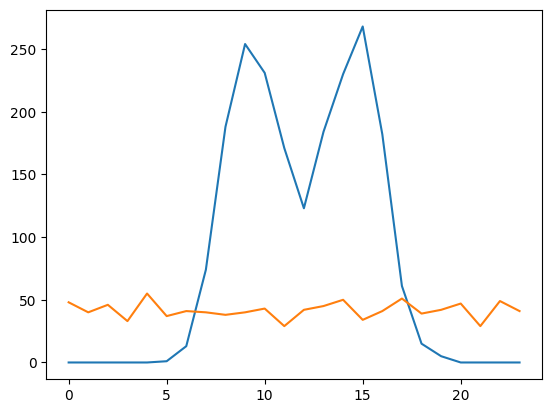

In [ ]:
plt.plot(students)
plt.plot(rain)

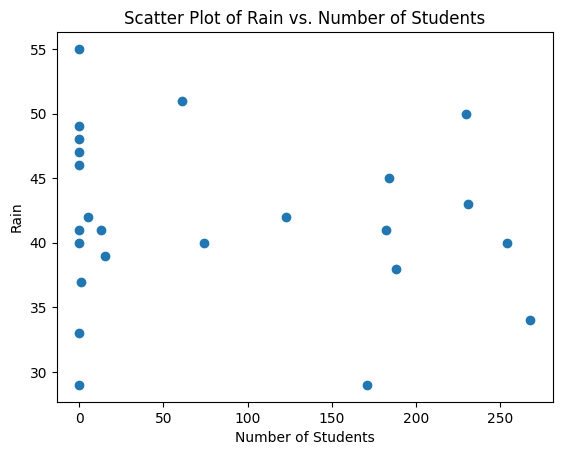

In [ ]:
plt.title('Scatter Plot of Rain vs. Number of Students')
plt.xlabel('Number of Students')
plt.ylabel('Rain')
plt.scatter(students, rain)